In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how ='outer')
# Display the data table for preview
#mouse_metadata
#study_results
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
len(merged_df['Mouse ID'].unique())

249

In [12]:
duplicates = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
duplicate_mouse = merged_df[merged_df['Mouse ID']=='g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
cleaned_df = merged_df[merged_df['Mouse ID']!='g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
num_mice_cleaned = len(cleaned_df['Mouse ID'].unique())
num_mice_cleaned

248

In [17]:
cleaned_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [23]:
summary_result = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                         ['mean', 'median','var','std','sem']}) 
result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [25]:
grouped_df = cleaned_df.groupby('Drug Regimen')
print(grouped_df.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16          0   
1       k403     Ramicane    Male          21          16          5   
2       k403     Ramicane    Male          21          16         10   
3       k403     Ramicane    Male          21          16         15   
4       k403     Ramicane    Male          21          16         20   
10      s185    Capomulin  Female           3          17          0   
11      s185    Capomulin  Female           3          17          5   
12      s185    Capomulin  Female           3          17         10   
13      s185    Capomulin  Female           3          17         15   
14      s185    Capomulin  Female           3          17         20   
454     a203    Infubinol  Female          20          23          0   
455     a203    Infubinol  Female          20          23          5   
456     a203    Infubinol  Female          20          23       

In [38]:
mean_gp =grouped_df['Tumor Volume (mm3)'].mean()
median_gp =grouped_df['Tumor Volume (mm3)'].median()
var_gp =grouped_df['Tumor Volume (mm3)'].var()
std_gp =grouped_df['Tumor Volume (mm3)'].std()
sem_gp =grouped_df['Tumor Volume (mm3)'].sem()



sem_gp

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [42]:
summary1 = pd.DataFrame([mean_gp,median_gp,var_gp,std_gp,sem_gp]).transpose()
summary1 = summary1[columns=]

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
import numpy as np
x_axis = np.arange(len(grouped_df['Drug Regimen']))
tick_locations = [value+0.4 for value in x_axis]

Drug Regimen
Capomulin    AxesSubplot(0.125,0.125;0.775x0.755)
Ceftamin     AxesSubplot(0.125,0.125;0.775x0.755)
Infubinol    AxesSubplot(0.125,0.125;0.775x0.755)
Ketapril     AxesSubplot(0.125,0.125;0.775x0.755)
Naftisol     AxesSubplot(0.125,0.125;0.775x0.755)
Placebo      AxesSubplot(0.125,0.125;0.775x0.755)
Propriva     AxesSubplot(0.125,0.125;0.775x0.755)
Ramicane     AxesSubplot(0.125,0.125;0.775x0.755)
Stelasyn     AxesSubplot(0.125,0.125;0.775x0.755)
Zoniferol    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

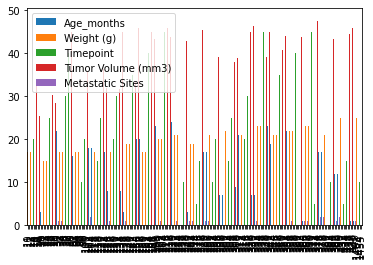

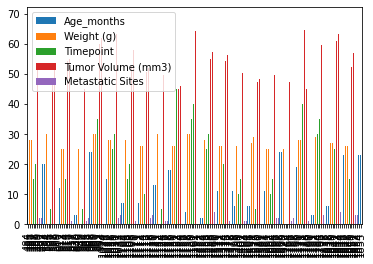

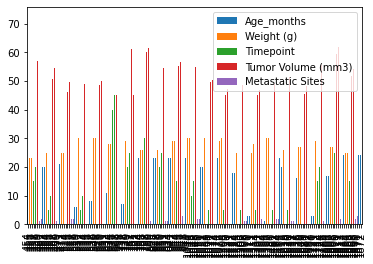

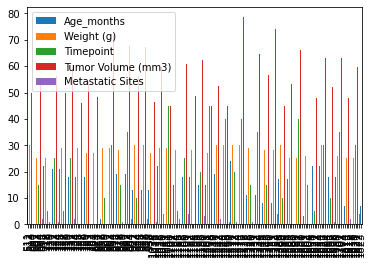

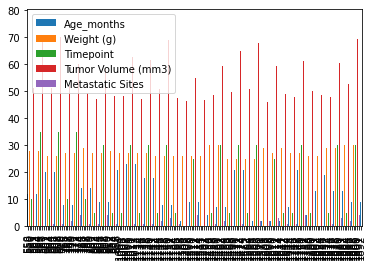

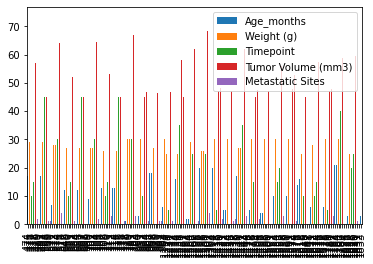

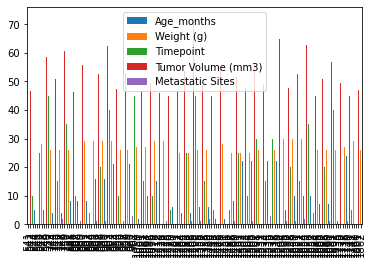

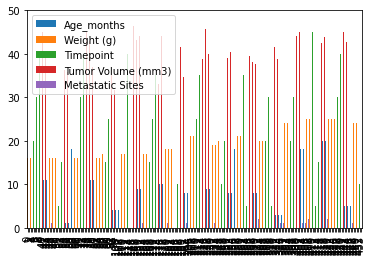

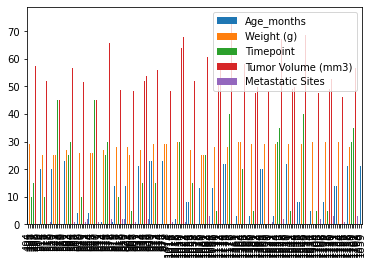

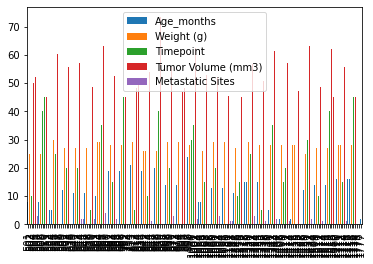

In [51]:
grouped_df.plot.bar()

In [52]:
cleaned_df['Drug Regimen'].plot.bar()

TypeError: no numeric data to plot

TypeError: unhashable type: 'numpy.ndarray'

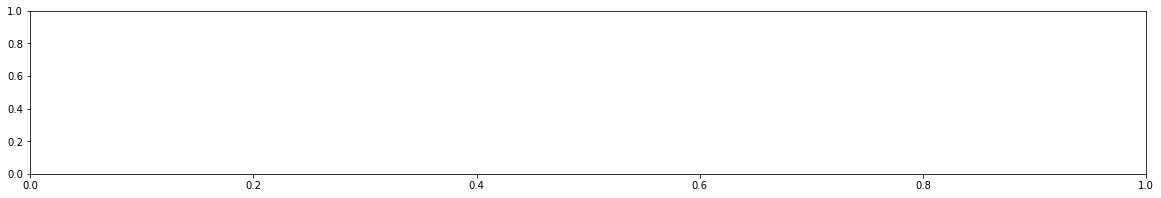

In [50]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, grouped_df["Drug Regimen"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, grouped_df["Drug Regimen"], rotation="vertical")